In [1]:
# coding 
import math
from math import sqrt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20
import requests
from statsmodels.tsa.api import Holt
#importing data frame from acquire.py file
import acquire
import prepare

# Acquire

In [2]:
df = acquire.all_gas_data()
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


In [3]:
df.describe()

,Year,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
count,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000,73069.000000,...,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000,73278.000000
mean,2007.497421,5.592745,6.912555,6.033788,7.548762,6.541330,8.129597,206.355569,5.592745,6.932327,...,2.224849,2.178319,2.328543,2.381831,2.320258,2.507575,2.518497,2.470986,2.607724,2.403887
std,7.501230,2.739560,2.945857,1.116701,0.531842,1.658027,1.095068,32.901687,2.739560,2.926744,...,0.851061,0.836465,0.877641,0.882893,0.859371,0.909548,0.911727,0.895228,0.926186,0.999643
min,1995.000000,0.000000,0.000000,4.250000,6.420000,4.250000,6.420000,152.400000,0.000000,0.000000,...,0.907000,0.885000,0.974000,1.008000,0.979000,1.112000,1.100000,1.074000,1.191000,0.953000
25%,2001.000000,4.300000,6.610000,5.150000,7.210000,5.150000,7.400000,177.100000,4.300000,6.610000,...,1.420000,1.388000,1.489000,1.516000,1.477000,1.612000,1.606000,1.570000,1.693000,1.417000
50%,2007.000000,5.250000,7.740000,5.150000,7.520000,6.600000,7.920000,207.342000,5.250000,7.740000,...,2.236000,2.175000,2.365000,2.479000,2.404000,2.622000,2.686000,2.635000,2.762000,2.476000
75%,2014.000000,7.250000,8.600000,7.250000,7.920000,7.250000,8.600000,236.736000,7.250000,8.600000,...,2.831000,2.767000,2.979000,3.034000,2.931000,3.207000,3.209000,3.128000,3.318000,3.070000
max,2020.000000,14.000000,14.160000,7.250000,8.600000,14.000000,14.160000,258.660000,14.000000,14.160000,...,4.114000,4.054000,4.247000,4.229000,4.153000,4.387000,4.344000,4.283000,4.459000,4.764000


# Prepare

In [4]:
df = prepare.prep_gas_data(df)
df

,Year,State,State.Minimum.Wage,MeanAnnualInflation,UnemploymentRateDecember,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,YearsSinceLastChange,gasoline,diesel,state_wage,fed_wage,month,gas_fed_min_dif,gas_state_min_dif,diesel_fed_min_dif,diesel_state_min_dif
Date,,,,,,,,,,,,,,,,,,,
1995-01-02,1995,Alaska,4.75,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.127,1.104,4.75,4.25,01-Jan,0.265176,0.237263,0.259765,0.232421
1995-01-09,1995,Alaska,4.75,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.134,1.102,4.75,4.25,01-Jan,0.266824,0.238737,0.259294,0.232000
1995-01-16,1995,Alaska,4.75,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.126,1.100,4.75,4.25,01-Jan,0.264941,0.237053,0.258824,0.231579
1995-01-23,1995,Alaska,4.75,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.132,1.095,4.75,4.25,01-Jan,0.266353,0.238316,0.257647,0.230526
1995-01-30,1995,Alaska,4.75,2.80%,5.60%,2.70%,Democrat,Republican,Republican,4,1.131,1.090,4.75,4.25,01-Jan,0.266118,0.238105,0.256471,0.229474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,2020,Wyoming,5.15,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.211,2.502,5.15,7.25,11-Nov,0.304966,0.429320,0.345103,0.485825
2020-12-07,2020,Wyoming,5.15,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.246,2.526,5.15,7.25,12-Dec,0.309793,0.436117,0.348414,0.490485
2020-12-14,2020,Wyoming,5.15,1.20%,6.70%,-3.40%,Republican,Republican,Democrat,11,2.247,2.559,5.15,7.25,12-Dec,0.309931,0.436311,0.352966,0.496893


In [5]:
df = df.drop(columns= ['HouseParty','SenParty','PresParty','diesel_fed_min_dif','YearsSinceLastChange',
                       'State','gas_state_min_dif','diesel_state_min_dif','diesel','state_wage',
                      'MeanAnnualInflation','UnemploymentRateDecember','GDP_AnnualGrowth'])

In [6]:
df

,Year,State.Minimum.Wage,gasoline,fed_wage,month,gas_fed_min_dif
Date,,,,,,
1995-01-02,1995,4.75,1.127,4.25,01-Jan,0.265176
1995-01-09,1995,4.75,1.134,4.25,01-Jan,0.266824
1995-01-16,1995,4.75,1.126,4.25,01-Jan,0.264941
1995-01-23,1995,4.75,1.132,4.25,01-Jan,0.266353
1995-01-30,1995,4.75,1.131,4.25,01-Jan,0.266118
...,...,...,...,...,...,...
2020-11-30,2020,5.15,2.211,7.25,11-Nov,0.304966
2020-12-07,2020,5.15,2.246,7.25,12-Dec,0.309793
2020-12-14,2020,5.15,2.247,7.25,12-Dec,0.309931


In [7]:
df = df.drop(columns= ['Year','State.Minimum.Wage'])

In [8]:
df_resampled = df.resample('M')[['gasoline','fed_wage']].mean()
df_resampled.head()

,gasoline,fed_wage
Date,,
1995-01-31,1.13000,4.25
1995-02-28,1.12025,4.25
1995-03-31,1.11850,4.25
1995-04-30,1.15725,4.25
1995-05-31,1.22520,4.25


In [9]:
df_resampled.shape

(312, 2)

In [10]:
# set train size to be 50% of total 
train_size = int(round(df_resampled.shape[0] * 0.5))
train_size

156

In [11]:
# set validate size to be 30% of total 
validate_size = int(round(df_resampled.shape[0] * 0.3))
validate_size

94

In [12]:
# set test size to be number of rows remaining. 
test_size = int(round(df_resampled.shape[0] * 0.2))
test_size

62

In [13]:
len(df_resampled) == train_size + validate_size + test_size

True

In [14]:
# validate will go from 912 to 912+547
validate_end_index = train_size + validate_size
validate_end_index
# train will go from 0 to 911
train = df_resampled[:train_size]
# validate will go from 912 to 1458
validate = df_resampled[train_size:validate_end_index]
# test will include 1459 to the end
test = df_resampled[validate_end_index:]

In [15]:
train.head()

,gasoline,fed_wage
Date,,
1995-01-31,1.13000,4.25
1995-02-28,1.12025,4.25
1995-03-31,1.11850,4.25
1995-04-30,1.15725,4.25
1995-05-31,1.22520,4.25


***

In [16]:
train.shape[0], validate.shape[0], test.shape[0]

(156, 94, 62)

### Verify Splits

Does the length of each df equate to the length of the original df?

In [17]:
# is len of train + validate + test == lenght of entire dataframe. 
len(train) + len(validate) + len(test) == len(df_resampled)

True

In [18]:
#Does the first row of original df equate to the first row of train?
print(df_resampled.head(1) == train.head(1))

            gasoline  fed_wage
Date                          
1995-01-31      True      True


In [19]:
pd.concat([train.tail(1), validate.head(1)])

,gasoline,fed_wage
Date,,
2007-12-31,3.0704,5.15
2008-01-31,3.0945,5.85


In [20]:
pd.concat([validate.tail(1), test.head(1)])

,gasoline,fed_wage
Date,,
2015-10-31,2.38675,7.25
2015-11-30,2.26020,7.25


In [21]:
train.columns

Index(['gasoline', 'fed_wage'], dtype='object')

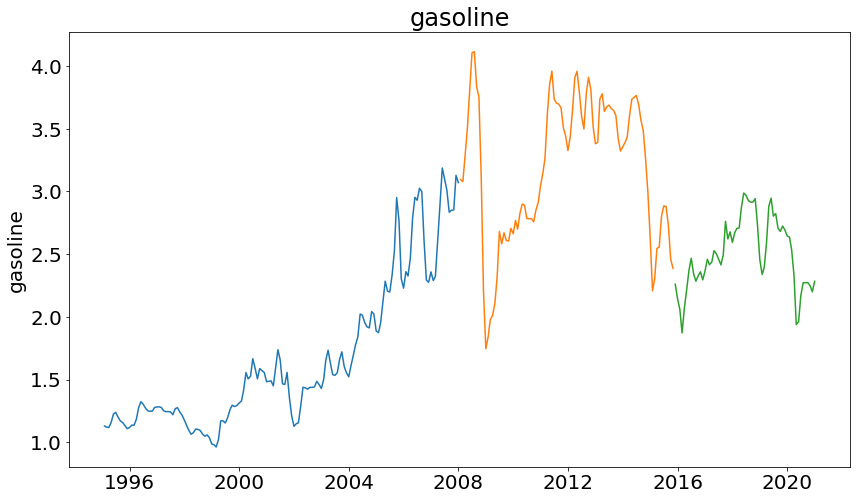

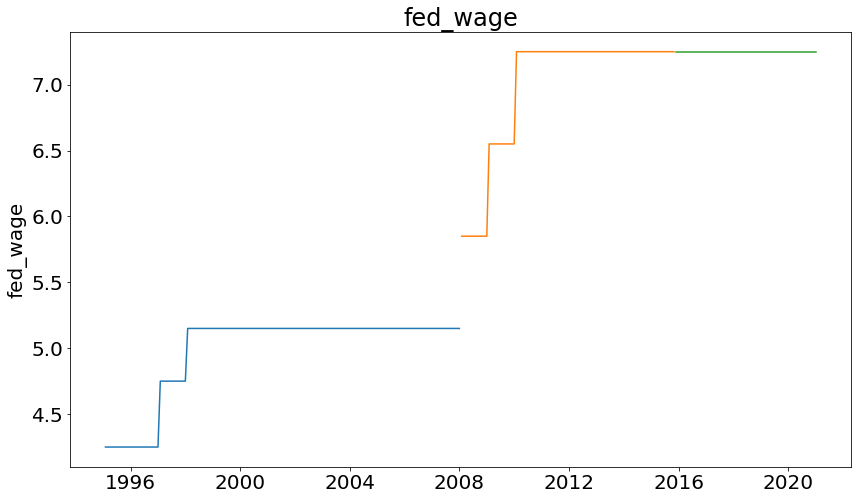

In [22]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [23]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [24]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var])
    plt.plot(validate[target_var])
    plt.plot(test[target_var])
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    #rmse = evaluate(target_var)
    #print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [25]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [26]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [27]:
eval_df

,model_type,target_var,rmse


### Forecast
Forecasting is another word for predicting time series data.

- Last Observed Value: The future will look like the now
- Simple Average: The future will look, on average, like history.
- Moving Average: The future will look, on average, like recent history.
- Holt's Linear Trend
- Previous Cycle
### Last observed value
The simplest method for forecasting is to predict all future values to be the last observed value.

### Make Predictions

gasoline prices

In [28]:
validate.head()

,gasoline,fed_wage
Date,,
2008-01-31,3.09450,5.85
2008-02-29,3.07825,5.85
2008-03-31,3.29320,5.85
2008-04-30,3.50725,5.85
2008-05-31,3.81500,5.85


In [29]:
train['gasoline'][-1:][0]

3.0704000000000002

In [30]:
# take the last item of sales total and assign to variable
last_gas_price = train['gasoline'][-1:][0]
last_gas_price

3.0704000000000002

### gas_fed_min_dif

In [31]:
# take the last item of quantity and assign to variable
last_fed_wage = round(train['fed_wage'][-1:][0],2)
last_fed_wage

5.15

In [32]:
yhat_df = pd.DataFrame(
    {'gasoline': [last_gas_price],
     'fed_wage': [last_fed_wage]},
    index=validate.index)

yhat_df.head()

,gasoline,fed_wage
Date,,
2008-01-31,3.0704,5.15
2008-02-29,3.0704,5.15
2008-03-31,3.0704,5.15
2008-04-30,3.0704,5.15
2008-05-31,3.0704,5.15


In [33]:
yhat_df.describe()

,gasoline,fed_wage
count,9.400000e+01,9.400000e+01
mean,3.070400e+00,5.150000e+00
std,4.464704e-15,8.929408e-15
min,3.070400e+00,5.150000e+00
25%,3.070400e+00,5.150000e+00
50%,3.070400e+00,5.150000e+00
75%,3.070400e+00,5.150000e+00
max,3.070400e+00,5.150000e+00


## Simple Average
Take the simple average of historical values and use that value to predict future values.

This is a good option for an initial baseline. Every future datapoint (those in 'test') will be assigned the same value, and that value will be the overall mean of the values in train.

Make Predictions

gasoline: establishing the value of the prediction we will make

In [34]:
# compute simple average
avg_gas = round(train['gasoline'].mean(), 2)
avg_gas

1.66

In [35]:
avg_fed_wage = round(train['fed_wage'].mean(), 2)
avg_fed_wage

4.98

In [36]:
def make_predictions(gas=None, wage=None):
    yhat_df = pd.DataFrame({'gasoline': [gas],
                           'fed_wage': [wage]},
                          index=validate.index)
    return yhat_df

In [37]:
yhat_df = make_predictions(avg_gas, avg_fed_wage)

In [38]:
yhat_df.head()

,gasoline,fed_wage
Date,,
2008-01-31,1.66,4.98
2008-02-29,1.66,4.98
2008-03-31,1.66,4.98
2008-04-30,1.66,4.98
2008-05-31,1.66,4.98


In [39]:
yhat_df.describe()

,gasoline,fed_wage
count,9.400000e+01,9.400000e+01
mean,1.660000e+00,4.980000e+00
std,2.455587e-15,5.357645e-15
min,1.660000e+00,4.980000e+00
25%,1.660000e+00,4.980000e+00
50%,1.660000e+00,4.980000e+00
75%,1.660000e+00,4.980000e+00
max,1.660000e+00,4.980000e+00


### Moving Average
In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value.

In [40]:
# demonstrate that the mean of the first 30 days 
# is equal to rolling(30) on day 30

print(train['gasoline'].rolling(1).mean())

Date
1995-01-31    1.13000
1995-02-28    1.12025
1995-03-31    1.11850
1995-04-30    1.15725
1995-05-31    1.22520
1995-06-30    1.23850
1995-07-31    1.20080
1995-08-31    1.17000
1995-09-30    1.15775
1995-10-31    1.13360
1995-11-30    1.10850
1995-12-31    1.11750
1996-01-31    1.13680
1996-02-29    1.13550
1996-03-31    1.18300
1996-04-30    1.27540
1996-05-31    1.32375
1996-06-30    1.30325
1996-07-31    1.27260
1996-08-31    1.25075
1996-09-30    1.24700
1996-10-31    1.24900
1996-11-30    1.27775
1996-12-31    1.28180
1997-01-31    1.28250
1997-02-28    1.27625
1997-03-31    1.25120
1997-04-30    1.24425
1997-05-31    1.24450
1997-06-30    1.24180
1997-07-31    1.21975
1997-08-31    1.26775
1997-09-30    1.27600
1997-10-31    1.24200
1997-11-30    1.21575
1997-12-31    1.17700
1998-01-31    1.13225
1998-02-28    1.09600
1998-03-31    1.06380
1998-04-30    1.07675
1998-05-31    1.10525
1998-06-30    1.10260
1998-07-31    1.09350
1998-08-31    1.06500
1998-09-30    1.04850
1998-

In [41]:
period=30
train['gasoline'].rolling(period).mean()[-1]

2.6878916666666663

In [42]:
period = 30 

# take 30 day rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
rolling_gas = round(train['gasoline'].rolling(period).mean()[-1], 2)
rolling_fed_wage = round(train['fed_wage'].rolling(period).mean()[-1], 2)
print(rolling_gas, rolling_fed_wage)

2.69 5.15


In [43]:
yhat_df = make_predictions(rolling_gas, rolling_fed_wage)
yhat_df.head()

,gasoline,fed_wage
Date,,
2008-01-31,2.69,5.15
2008-02-29,2.69,5.15
2008-03-31,2.69,5.15
2008-04-30,2.69,5.15
2008-05-31,2.69,5.15


In [44]:
import statsmodels.api as sm

fed_wage 



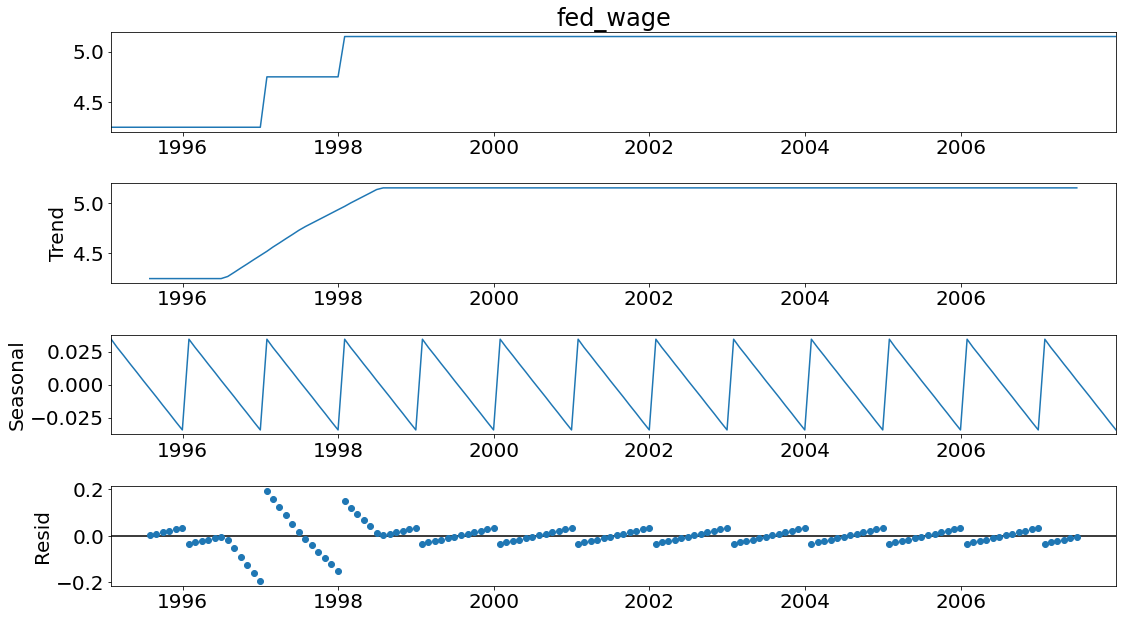

In [46]:
print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()
plt.show()

gasoline 

fed_wage 



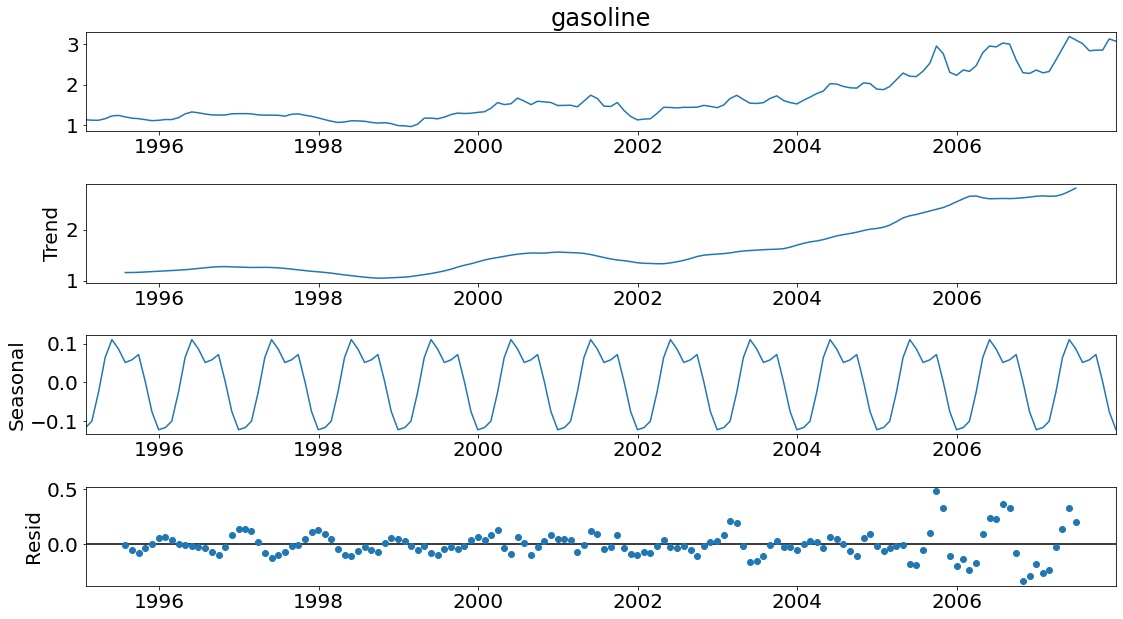

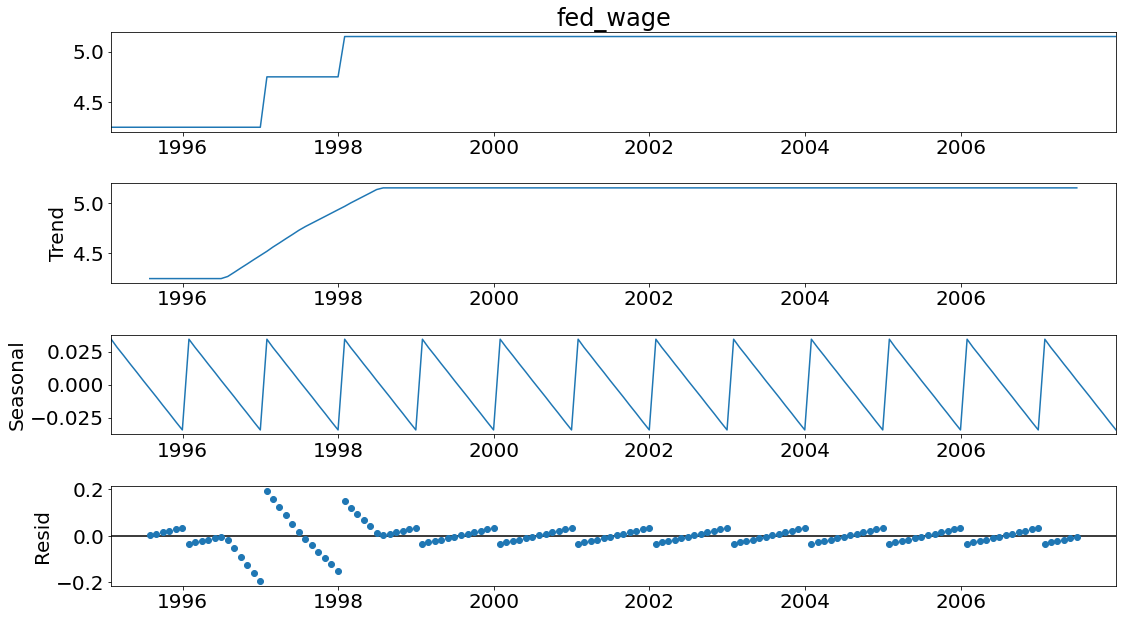

In [48]:
for col in train.columns:
    print(col,'\n')
    sm.tsa.seasonal_decompose(train[col].resample('m').mean()).plot()

In [49]:
train.columns

Index(['gasoline', 'fed_wage'], dtype='object')

In [50]:
col = 'gasoline' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

In [51]:

# fit the holt's object
model = model.fit(optimized=True)

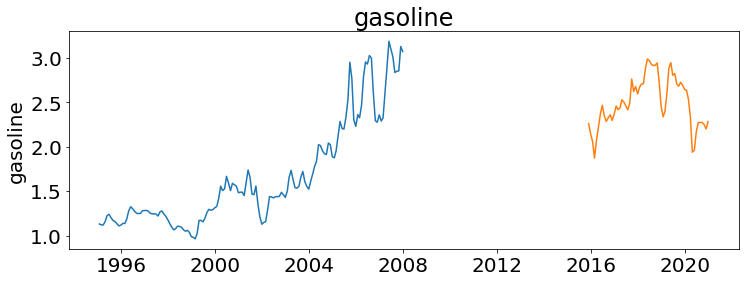

In [52]:
for col in train.columns[:1]:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [53]:
train.head()

,gasoline,fed_wage
Date,,
1995-01-31,1.13000,4.25
1995-02-28,1.12025,4.25
1995-03-31,1.11850,4.25
1995-04-30,1.15725,4.25
1995-05-31,1.22520,4.25


In [54]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

In [55]:
# create a dataframe with the average rise in gas prices
# from the train dataset (2017-2021)

gas = round(train['gasoline'].mean(),2)
dif = round(train['gas_fed_min_dif'].mean(),2)

yhat_df = pd.DataFrame({'gasoline':[gas],
                        'gas_fed_min_dif':[dif]}, index=test.index)

KeyError: 'gas_fed_min_dif'

In [56]:
yhat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2008-01-31 to 2015-10-31
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gasoline  94 non-null     float64
 1   fed_wage  94 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


In [57]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2008-01-31 to 2015-10-31
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gasoline  94 non-null     float64
 1   fed_wage  94 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2015-11-30 to 2020-12-31
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gasoline  62 non-null     float64
 1   fed_wage  62 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


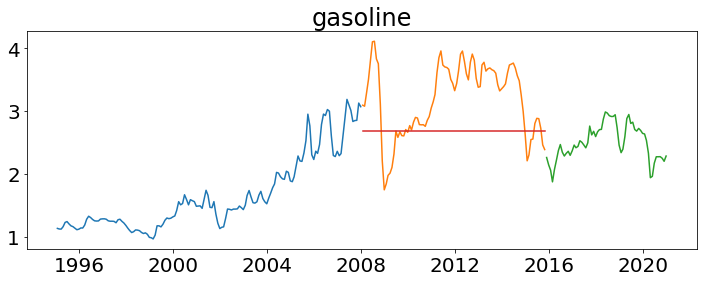

In [59]:
# Plot actual vs predicted
plot_and_eval(col)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1995-01-31 to 2007-12-31
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gasoline  156 non-null    float64
 1   fed_wage  156 non-null    float64
dtypes: float64(2)
memory usage: 3.7 KB


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2015-11-30 to 2020-12-31
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gasoline  62 non-null     float64
 1   fed_wage  62 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


In [62]:
yhat_df

,gasoline,fed_wage
Date,,
2008-01-31,2.69,5.15
2008-02-29,2.69,5.15
2008-03-31,2.69,5.15
2008-04-30,2.69,5.15
2008-05-31,2.69,5.15
2008-06-30,2.69,5.15
2008-07-31,2.69,5.15
2008-08-31,2.69,5.15
2008-09-30,2.69,5.15
